# Term Deposit Marketing

## Background

ACME is a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, at ACME we are looking to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

## Data Description

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

## Attributes

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)


## Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

## Success Metric(s)

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

## Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("term-deposit-marketing-2020.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [3]:
df_copy = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

* Veri seti içerisinde null veri gözükmemektedir. Ancak, birçok unknown etiketli veri olduğu için dönüşüm yapmamız gerekmektedir.

### Unique Values

Kolonlar içerisindeki verilerin nasıl bir düzende olduğunu görmek için bakıyoruz.

In [6]:
def print_uniques(df):
    cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "day", "month", "campaign", "y"]

    for col in cols:
        print(col, df[col].unique())

In [7]:
print_uniques(df)

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
y ['no' 'yes']


### Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


#### Age Distribution

<AxesSubplot:ylabel='Frequency'>

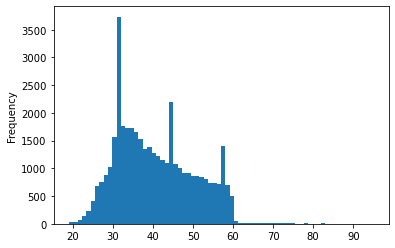

In [11]:
df["age"].plot.hist(bins=len(df["age"].unique()))

C:\Users\Einsteinekeine\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

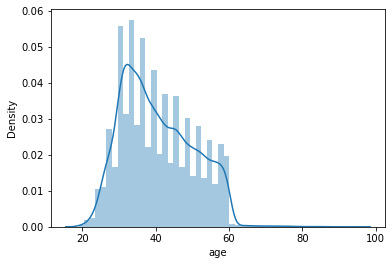

In [12]:
sns.distplot(df["age"])

#### Job Distribution

<AxesSubplot:ylabel='job'>

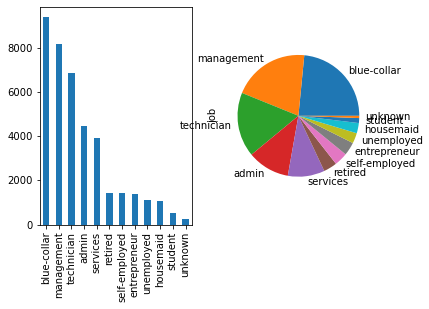

In [13]:
fig, (ax, ax2) = plt.subplots(ncols=2)
df["job"].value_counts().plot.bar(ax=ax)
df["job"].value_counts().plot.pie(ax=ax2)

#### Marital Distribution

<AxesSubplot:ylabel='marital'>

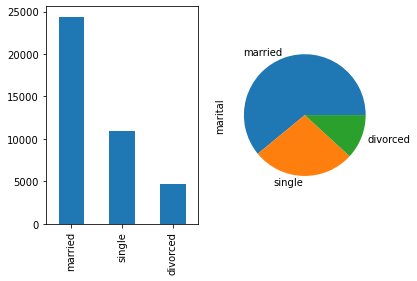

In [14]:
fig, (ax, ax2) = plt.subplots(ncols=2)
df["marital"].value_counts().plot.bar(ax=ax)
df["marital"].value_counts().plot.pie(ax=ax2)

#### Education Distribution

<AxesSubplot:ylabel='education'>

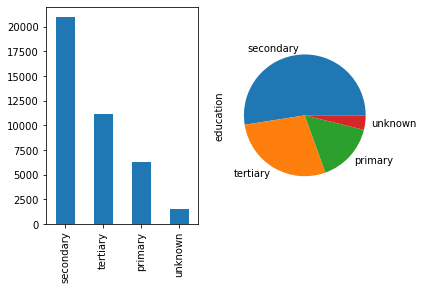

In [15]:
fig, (ax, ax2) = plt.subplots(ncols=2)
df["education"].value_counts().plot.bar(ax=ax)
df["education"].value_counts().plot.pie(ax=ax2)

#### Default Distribution

**default:** has credit in default

<AxesSubplot:ylabel='default'>

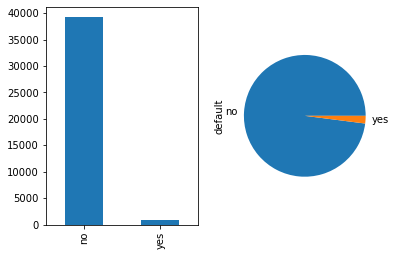

In [16]:
fig, (ax, ax2) = plt.subplots(ncols=2)
df["default"].value_counts().plot.bar(ax=ax)
df["default"].value_counts().plot.pie(ax=ax2)

#### Balance Distribution

**balance:** average yearly balance, in euros

<AxesSubplot:ylabel='Frequency'>

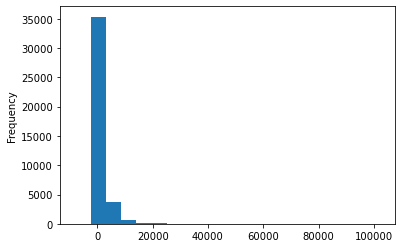

In [17]:
df["balance"].plot.hist(bins=20)

C:\Users\Einsteinekeine\Anaconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='balance'>

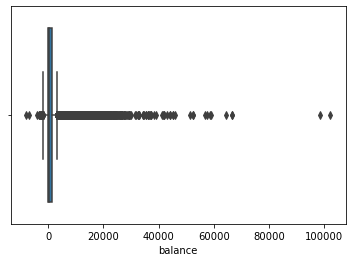

In [18]:
sns.boxplot(df["balance"])

* balance değerleri şüpheli görünüyor.

C:\Users\Einsteinekeine\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

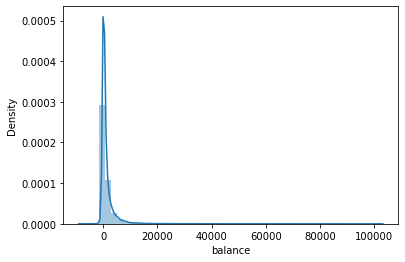

In [19]:
sns.distplot(df["balance"])

#### Housing Distribution

<AxesSubplot:ylabel='housing'>

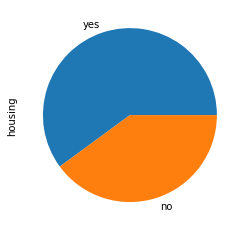

In [20]:
df["housing"].value_counts().plot.pie()

#### Loan Distribution

<AxesSubplot:ylabel='loan'>

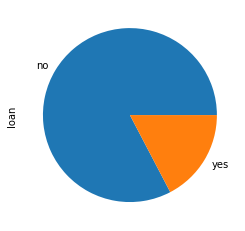

In [21]:
df["loan"].value_counts().plot.pie()

#### Contact Distribution

<AxesSubplot:ylabel='contact'>

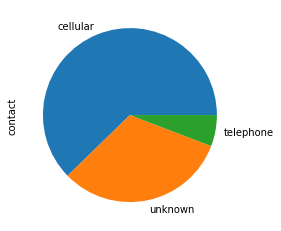

In [22]:
df["contact"].value_counts().plot.pie()

#### Day Distribution

**day:**  last contact day of the month

<AxesSubplot:>

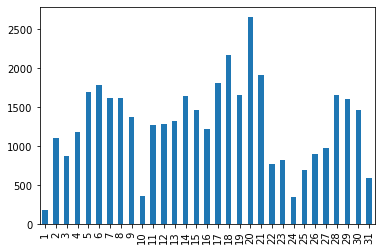

In [23]:
df["day"].value_counts().sort_index().plot.bar()

C:\Users\Einsteinekeine\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

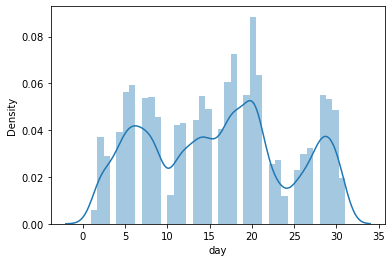

In [24]:
sns.distplot(df["day"])

#### Month Distribution

**month:** last contact month of year

In [25]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

<AxesSubplot:>

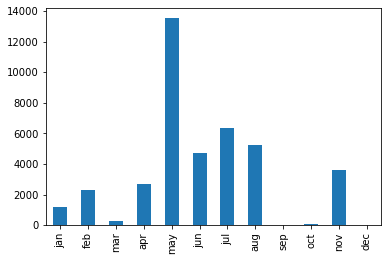

In [26]:
df["month"].value_counts().reindex(months).plot.bar()

#### Duration Distribution

**duration:** last contact duration, in seconds 

<AxesSubplot:ylabel='Frequency'>

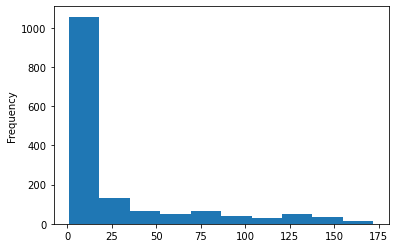

In [27]:
df["duration"].value_counts().sort_index().plot.hist(bins=10)

#### Campaign Distribution

**campaign**: number of contacts performed during this campaign and for this client

<AxesSubplot:>

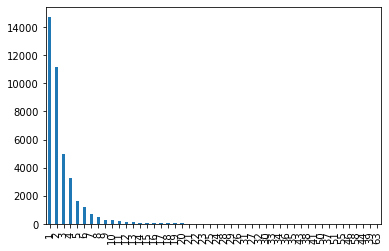

In [28]:
df["campaign"].value_counts().plot.bar()

#### Subscription Distribution

**y** - has the client subscribed to a term deposit

<AxesSubplot:ylabel='y'>

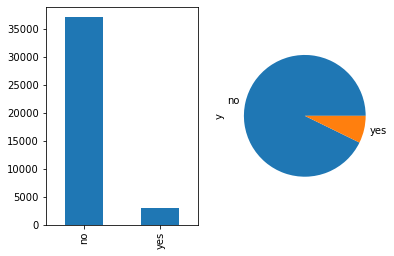

In [29]:
fig, (ax, ax2) = plt.subplots(ncols=2)
df["y"].value_counts().plot.bar(ax=ax)
df["y"].value_counts().plot.pie(ax=ax2)

## Data Preprocessing
### Transforming Null Values

In [30]:
df.replace("unknown", np.nan, inplace=True)

In [31]:
df.isna().sum()

age              0
job            235
marital          0
education     1531
default          0
balance          0
housing          0
loan             0
contact      12765
day              0
month            0
duration         0
campaign         0
y                0
dtype: int64

In [32]:
print_uniques(df)

job ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' nan 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact [nan 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
y ['no' 'yes']


In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,no


### Missing Values

In [34]:
import missingno as msno

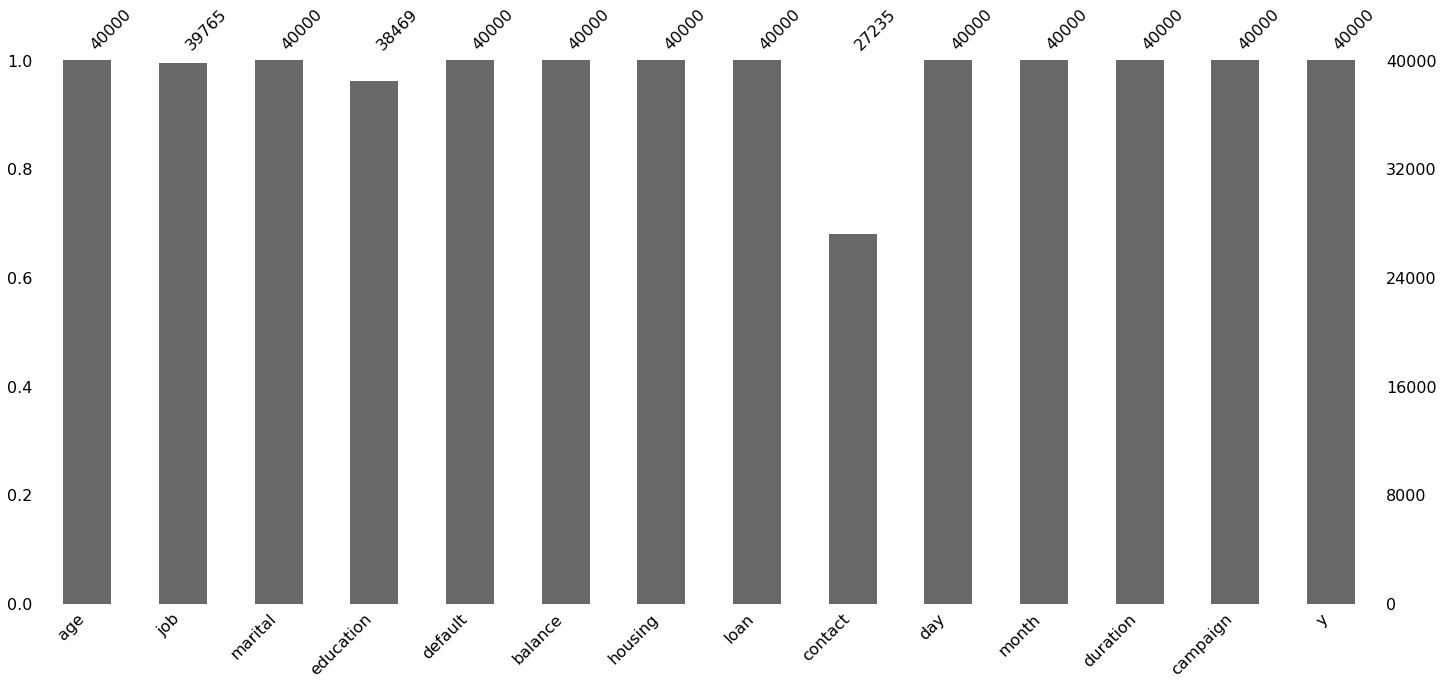

In [35]:
msno.bar(df);

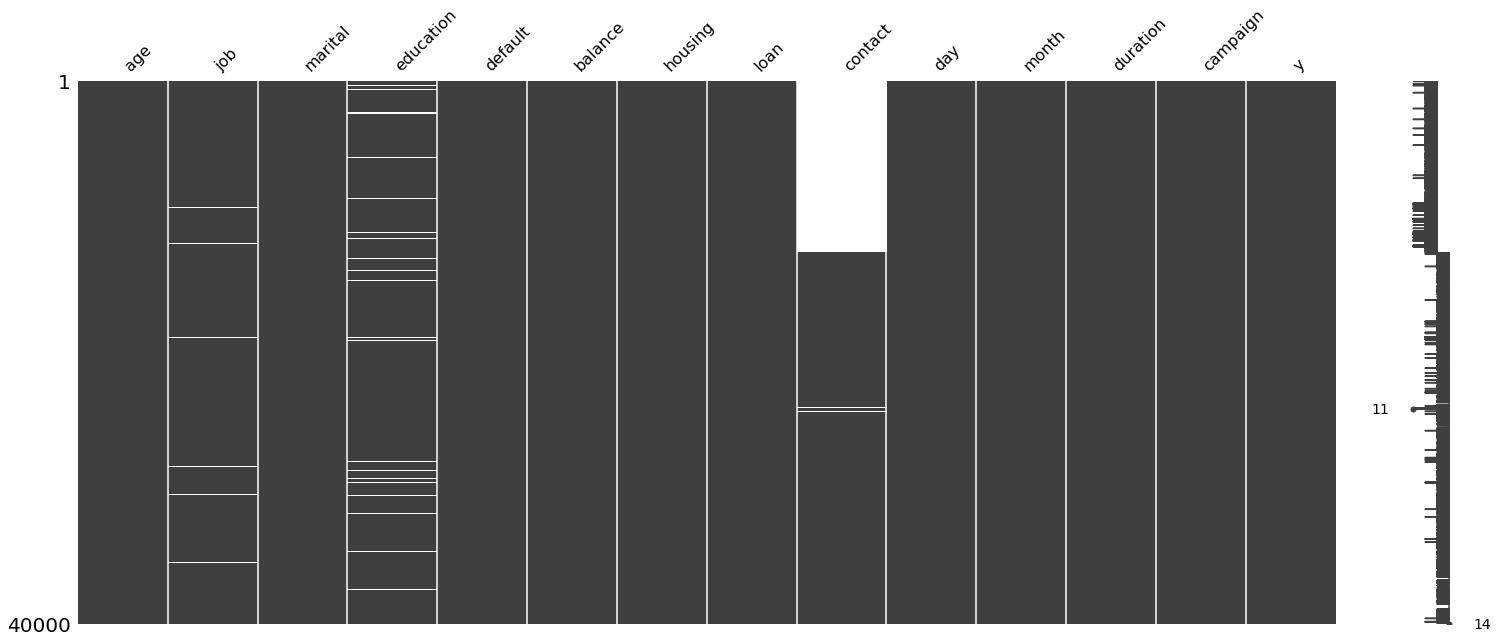

In [36]:
msno.matrix(df);

<AxesSubplot:>

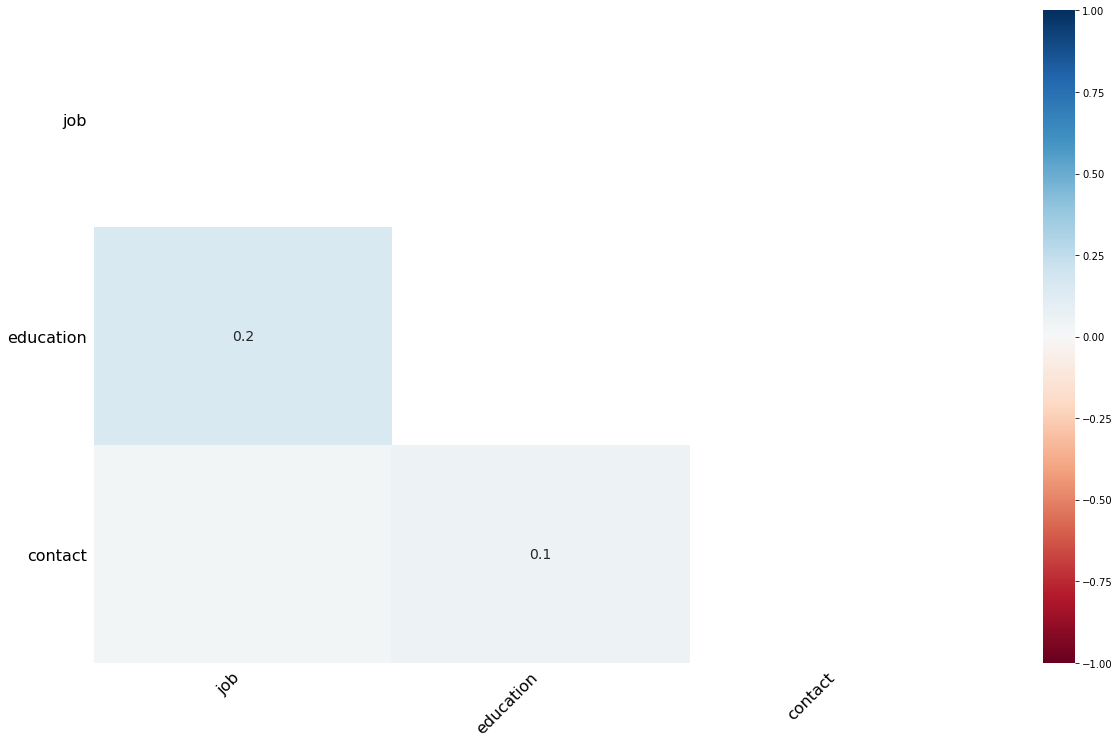

In [37]:
msno.heatmap(df)

### Handling Missing Values

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,no


In [39]:
df = df.astype({"job":'category', 
                "marital":'category', 
                "education":'category', 
                "contact":'category',
                "month":'category'}) 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        39765 non-null  category
 2   marital    40000 non-null  category
 3   education  38469 non-null  category
 4   default    40000 non-null  object  
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  object  
 7   loan       40000 non-null  object  
 8   contact    27235 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  object  
dtypes: category(5), int64(5), object(4)
memory usage: 2.9+ MB


In [41]:
df.isnull().sum()

age              0
job            235
marital          0
education     1531
default          0
balance          0
housing          0
loan             0
contact      12765
day              0
month            0
duration         0
campaign         0
y                0
dtype: int64

#### Removing A Feature

* Abonelik ile cep telefonundan mı yoksa ev telefonundan mı ulaşıldığının bir anlamı olmayacağını düşündüğüm ve çok fazla eksik veri olması sebebiyle contact özelliğini veri setinden çıkartıyorum.

In [42]:
#df = df.drop("contact", axis=1)

#### Imputing Missing Values Randomly

In [43]:
def na_randomfill(series):
    na_mask = pd.isnull(series)   # boolean mask for null values
    n_null = na_mask.sum()        # number of nulls in the Series
    
    if n_null == 0:
        return series             # if there are no nulls, no need to resample
    
    # Randomly sample the non-null values from our series
    #  only sample this Series as many times as we have nulls 
    fill_values = series[~na_mask].sample(n=n_null, replace=True, random_state=0)

    # This ensures our new values will replace NaNs in the correct locations
    fill_values.index = series.index[na_mask]
    
    return series.fillna(fill_values) 

In [44]:
df["job"] = na_randomfill(df["job"])
df["education"] = na_randomfill(df["education"])
df["contact"] = na_randomfill(df["contact"])

In [45]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

#### Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
df_en = df.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

In [48]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int32
 2   marital    40000 non-null  int32
 3   education  40000 non-null  int32
 4   default    40000 non-null  int32
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int32
 7   loan       40000 non-null  int32
 8   contact    40000 non-null  int32
 9   day        40000 non-null  int64
 10  month      40000 non-null  int32
 11  duration   40000 non-null  int64
 12  campaign   40000 non-null  int64
 13  y          40000 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 3.2 MB


### Feature Importances

[0.1105036  0.06836648 0.02468568 0.02487396 0.00412774 0.11302139
 0.01144688 0.01034427 0.00898847 0.11107052 0.09147893 0.34945767
 0.0716344 ]


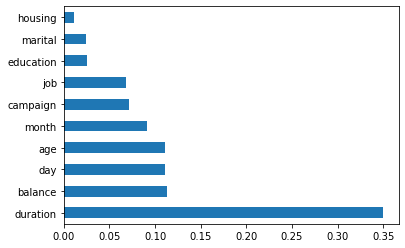

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X = df_en.drop("y", axis=1)
y = df_en["y"]
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Balancing the Data Set

* Under-sampling the data set for high precision and high recall

In [50]:
dff = pd.concat([df_en[df_en["y"] == 0][0:2896], df_en[df_en["y"] == 1]])

#### One Hot Encoding

In [51]:
dff.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,39,4,1,2,0,3023,1,0,0,4,8,261,0,0
1,25,9,2,1,0,945,1,0,0,4,8,151,0,0
2,14,2,1,1,0,918,1,1,0,4,8,76,0,0
3,28,1,1,0,0,2420,1,0,0,4,8,92,0,0
4,14,0,2,2,0,917,0,0,0,4,8,198,0,0


In [52]:
dff = pd.get_dummies(dff, columns=["job", "marital", "education", "month"])
dff.head()

,age,default,balance,housing,loan,contact,day,duration,campaign,y,...,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10
0,39,0,3023,1,0,0,4,261,0,0,...,0,0,0,0,0,0,0,1,0,0
1,25,0,945,1,0,0,4,151,0,0,...,0,0,0,0,0,0,0,1,0,0
2,14,0,918,1,1,0,4,76,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,0,2420,1,0,0,4,92,0,0,...,0,0,0,0,0,0,0,1,0,0
4,14,0,917,0,0,0,4,198,0,0,...,0,0,0,0,0,0,0,1,0,0


## Prediction

In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [54]:
X = dff.drop("y", axis=1)
y = dff["y"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### Evaluation

In [56]:
def draw_roc(model):
    roc_auc = roc_auc_score(y, model.predict(X))

    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Oranı')
    plt.ylabel('True Positive Oranı')
    plt.title('ROC')
    plt.show()

In [57]:
def print_scores(model, X_train, X_test, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    cross = cross_val_score(model, X_test, y_test, cv = 10).mean()
    
    draw_roc(loj_model)
    plot_confusion_matrix(model, X_test, y_test)
    
    disp = plot_precision_recall_curve(loj_model, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')
    print('Accuracy: {0:0.3f} \nPrecision: {1:0.3f}\nRecall: {2:0.3f} \nF1-Score: {3:0.3f}\n10-Fold Cross Validation: {4:0.3f}'
          .format(acc, precision, recall, f1, cross))

### Logistic Regression

In [58]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
y_pred = loj_model.predict(X_test)

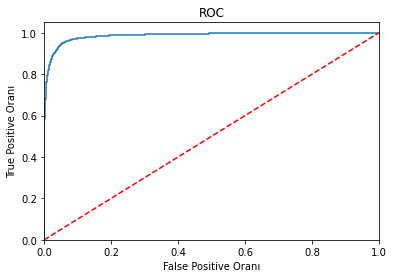

Accuracy: 0.949 
Precision: 0.954
Recall: 0.940 
F1-Score: 0.949
10-Fold Cross Validation: 0.949


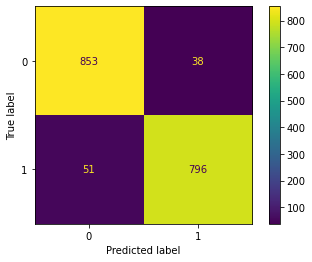

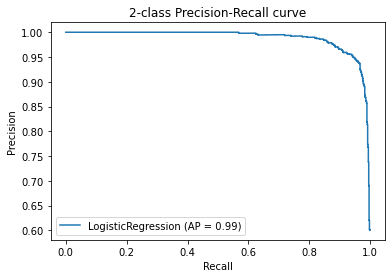

In [59]:
print_scores(loj_model, X_train, X_test, y_test, y_pred)

### Gaussian Naive Bayes

In [60]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

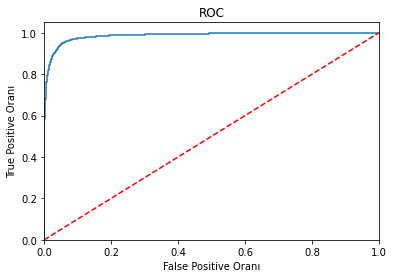

Accuracy: 0.886 
Precision: 0.991
Recall: 0.772 
F1-Score: 0.886
10-Fold Cross Validation: 0.884


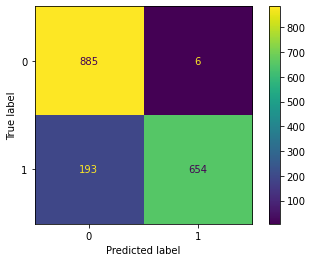

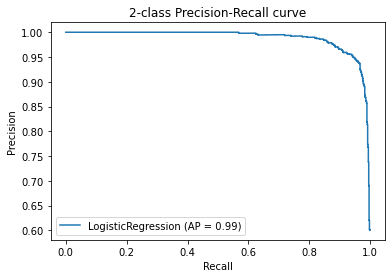

In [61]:
print_scores(nb_model, X_train, X_test, y_test, y_pred)

### K-Nearest Neighbours

In [62]:
%%time
knn = KNeighborsClassifier()

knn_params = {"n_neighbors": np.arange(1,15)}

knn_cv = GridSearchCV(knn, knn_params, 
                            cv = 10, 
                            n_jobs = 5, 
                            verbose = 2 )

knn_cv.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.1s


Wall time: 4.26 s


[Parallel(n_jobs=5)]: Done 140 out of 140 | elapsed:    4.1s finished


In [63]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.7965012467311319
En iyi parametreler: {'n_neighbors': 9}


In [64]:
knn = KNeighborsClassifier(9)
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

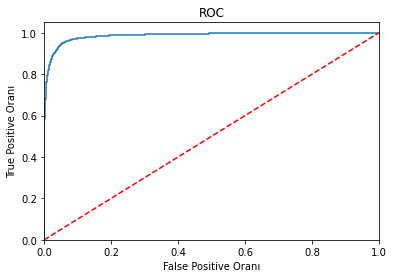

Accuracy: 0.801 
Precision: 0.801
Recall: 0.786 
F1-Score: 0.801
10-Fold Cross Validation: 0.779


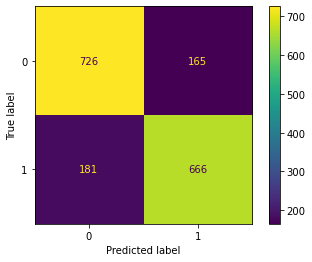

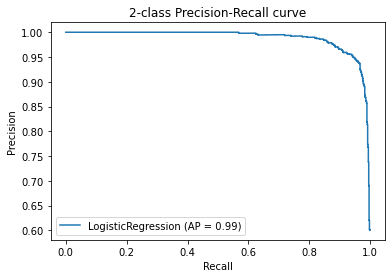

In [65]:
print_scores(knn_model, X_train, X_test, y_test, y_pred)

### Support Vector Classification

In [66]:
#%%time
#svc_model = SVC(kernel = "linear")
#svc_model.fit(X_train, y_train)
#y_pred = svc_model.predict(X_test)

In [67]:
#print_scores(svc_model, X_train, X_test, y_test, y_pred)

### RBF Vector Classification

In [68]:
%%time
rbf_model = SVC(kernel = "rbf")
rbf_model.fit(X_train, y_train)
y_pred = rbf_model.predict(X_test)

Wall time: 910 ms


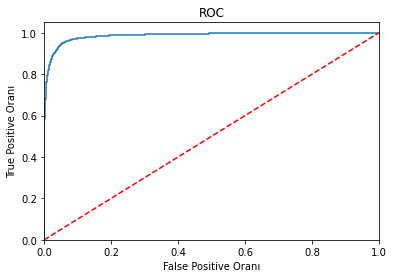

Accuracy: 0.812 
Precision: 0.805
Recall: 0.810 
F1-Score: 0.812
10-Fold Cross Validation: 0.804


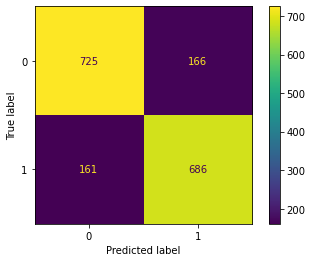

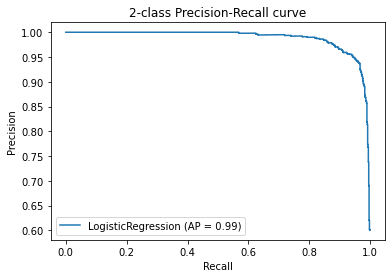

In [69]:
print_scores(rbf_model, X_train, X_test, y_test, y_pred)

### Neural Networks

In [70]:
scaler = StandardScaler()

In [71]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
%%time
mlpc_model = MLPClassifier()
mlpc_model.fit(X_train_scaled, y_train)
y_pred = mlpc_model.predict(X_test_scaled)

Wall time: 6.87 s


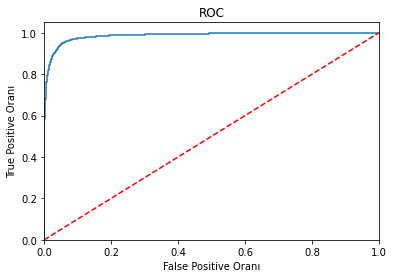

Accuracy: 0.948 
Precision: 0.944
Recall: 0.950 
F1-Score: 0.948
10-Fold Cross Validation: 0.913


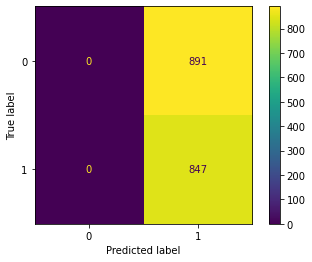

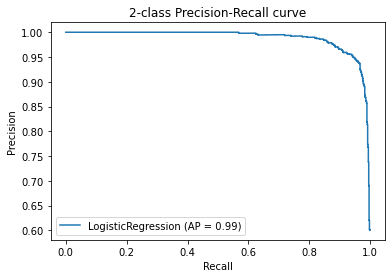

In [73]:
print_scores(mlpc_model, X_train, X_test, y_test, y_pred)

### CART

In [74]:
%%time
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = 5, verbose = 2)
cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 3574 tasks      | elapsed:    8.0s


Wall time: 9.82 s


[Parallel(n_jobs=5)]: Done 4320 out of 4320 | elapsed:    9.7s finished


In [75]:
print("En iyi parametreler: " + str(cart_cv.best_params_))

En iyi parametreler: {'max_depth': 4, 'min_samples_split': 2}


In [76]:
cart_model = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

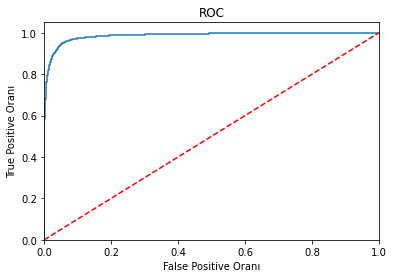

Accuracy: 0.951 
Precision: 0.925
Recall: 0.979 
F1-Score: 0.951
10-Fold Cross Validation: 0.953


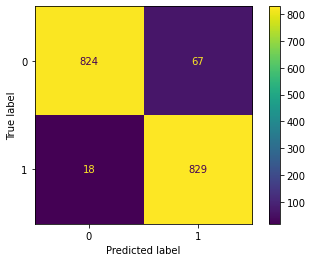

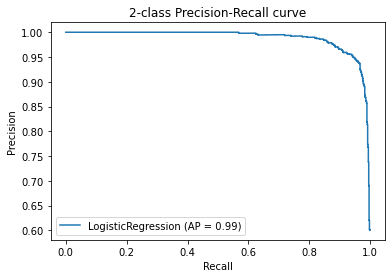

In [77]:
print_scores(cart_model, X_train, X_test, y_test, y_pred)

### Random Forest

In [78]:
%%time
rf_params = {"max_depth": [2,5,8],
            "max_features": [2,5,8],
            "n_estimators": [10,50,100],
            "min_samples_split": [2,5,10]}

rf_model = RandomForestClassifier()

rf_cv = GridSearchCV(rf_model, 
                       rf_params, 
                       cv = 10, 
                       n_jobs = 5, 
                       verbose = 2) 
rf_cv.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 294 tasks      | elapsed:    6.7s
[Parallel(n_jobs=5)]: Done 700 tasks      | elapsed:   17.4s


Wall time: 21.6 s


[Parallel(n_jobs=5)]: Done 810 out of 810 | elapsed:   21.3s finished


In [79]:
print("En iyi parametreler: " + str(rf_cv.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 50}


In [80]:
rf_model = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 5,
                                  n_estimators = 100)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

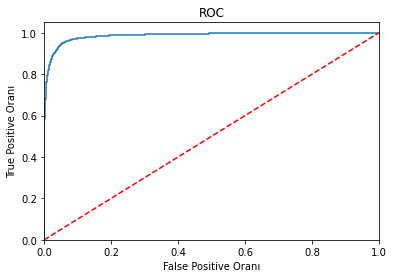

Accuracy: 0.959 
Precision: 0.963
Recall: 0.953 
F1-Score: 0.959
10-Fold Cross Validation: 0.956


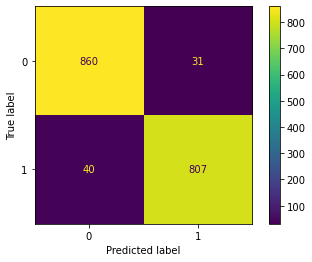

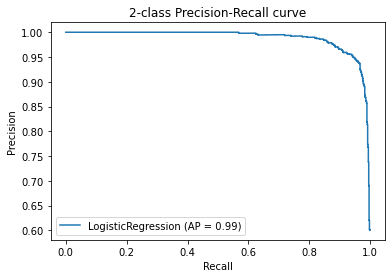

In [81]:
print_scores(rf_model, X_train, X_test, y_test, y_pred)

### Gradient Boosting Machines

In [82]:
%%time
gbm_model = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                 min_samples_split = 5,
                                 n_estimators = 100)
gbm_model.fit(X_train,y_train)
y_pred = gbm_model.predict(X_test)

Wall time: 818 ms


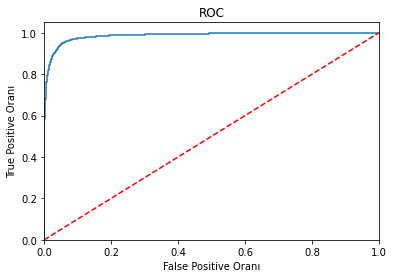

Accuracy: 0.951 
Precision: 0.928
Recall: 0.974 
F1-Score: 0.951
10-Fold Cross Validation: 0.945


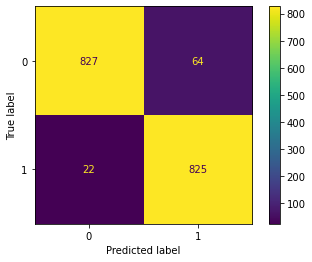

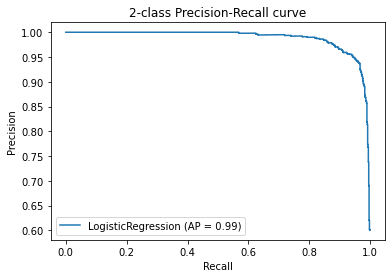

In [83]:
print_scores(gbm_model, X_train, X_test, y_test, y_pred)

### XGBoost

In [84]:
%%time
xgb_model = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

Wall time: 1.04 s


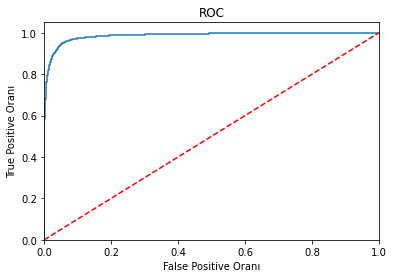

Accuracy: 0.955 
Precision: 0.957
Recall: 0.949 
F1-Score: 0.955
10-Fold Cross Validation: 0.953


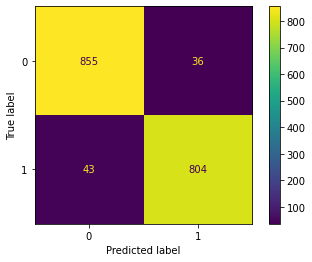

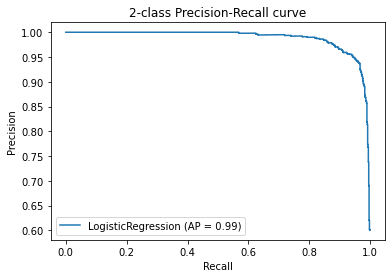

In [85]:
print_scores(xgb_model, X_train, X_test, y_test, y_pred)

### CatBoost

In [86]:
%%time
catb_model = CatBoostClassifier(iterations = 200, 
                                learning_rate = 0.05, 
                                depth = 5,
                                verbose=False)

catb_model.fit(X_train, y_train)
y_pred = catb_model.predict(X_test)

Wall time: 1.26 s


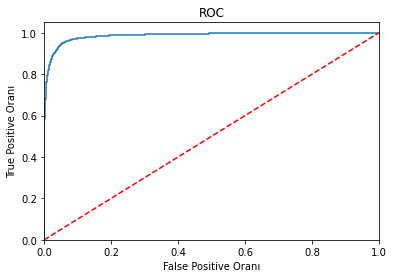

Accuracy: 0.960 
Precision: 0.966
Recall: 0.952 
F1-Score: 0.960
10-Fold Cross Validation: 0.954


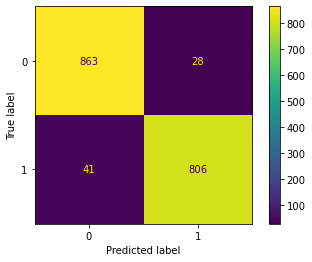

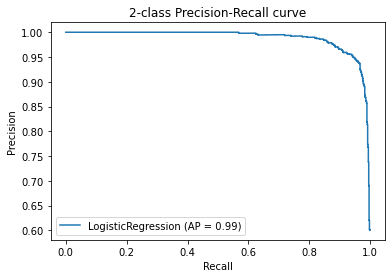

In [87]:
print_scores(catb_model, X_train, X_test, y_test, y_pred)

## Benchmarking All Models

In [88]:
models = [
    knn_model,
    loj_model,
    rbf_model,
    nb_model,
    mlpc_model,
    cart_model,
    rf_model,
    gbm_model,
    catb_model,
    xgb_model
]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(acc))

----------------------------
KNeighborsClassifier:
Accuracy: 80.0921%
----------------------------
LogisticRegression:
Accuracy: 94.8792%
----------------------------
SVC:
Accuracy: 81.1853%
----------------------------
GaussianNB:
Accuracy: 88.5501%
----------------------------
MLPClassifier:
Accuracy: 48.7342%
----------------------------
DecisionTreeClassifier:
Accuracy: 95.1093%
----------------------------
RandomForestClassifier:
Accuracy: 95.9148%
----------------------------
GradientBoostingClassifier:
Accuracy: 95.0518%
----------------------------
CatBoostClassifier:
Accuracy: 96.0299%
----------------------------
XGBClassifier:
Accuracy: 95.4545%


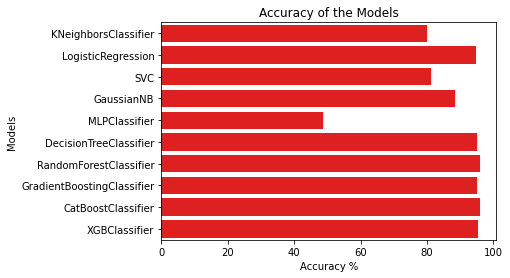

In [89]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the Models');    

In [90]:
results.sort_values(by="Accuracy", ascending=False, ignore_index=True)

,Models,Accuracy
0,CatBoostClassifier,96.029919
1,RandomForestClassifier,95.914845
2,XGBClassifier,95.454545
3,DecisionTreeClassifier,95.109321
4,GradientBoostingClassifier,95.051784
5,LogisticRegression,94.879171
6,GaussianNB,88.550058
7,SVC,81.185270
8,KNeighborsClassifier,80.092060
9,MLPClassifier,48.734177
